<a href="https://colab.research.google.com/github/LeonardoMorales/Python-Finance/blob/main/BTC-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BITCOIN PRICES (Facebook - Prophet)

In [3]:
import pandas_datareader.data as web
from datetime import datetime
import datetime as dt

In [4]:
#Librería para gráfica de velas
!pip install mplfinance

     |████████████████████████████████| 61kB 3.3MB/s 


In [5]:
#Librería para poder usar la gráfica de velas
import mplfinance as mpf

## Precio del Bitcoin por mes

In [14]:
inicio_mes = dt.datetime(2020,10,1)
fin_mes = dt.datetime(2020,12,31)

#Creando un dataframe
df_mes = web.DataReader("BTC-USD", "yahoo", inicio_mes, fin_mes)

## Gráfica de velas por mes

In [ ]:
mpf.plot(df_mes, type='candle',style="charles", title="Bitcoin Price Yearly", ylabel="Precio(USD)", mav=(3,6,9), volume=True)

##Precio del Bitcoin por día

In [28]:
hoy = datetime.now()
dia_inicio = dt.datetime(2021, 1, 1)
dia_fin = dt.datetime(2021, 1, 15)

df_dia = web.DataReader("TSLA", "yahoo", dia_inicio, dia_fin)

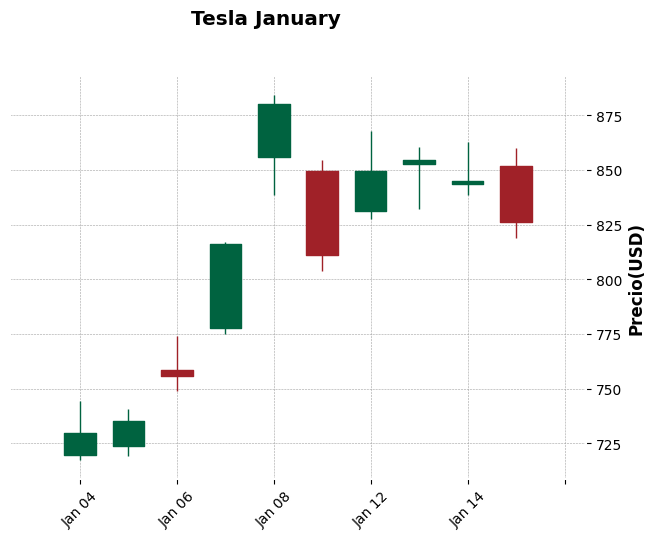

In [30]:
mpf.plot(df_dia, type='candle',style="charles", title="Tesla January", ylabel="Precio(USD)")

## Predicción de precio de bitcoin usando Prophet de Facebook

In [31]:
from fbprophet import Prophet

In [32]:
ahora = datetime.now()
#Primer registo BTC Yahoo Finance
inicio_hist = dt.datetime(2014,9,16)
fin_hist = dt.datetime(ahora.year, ahora.month, ahora.day)

#Datos históricos del precio del BTC al día de hoy en Yahoo
df_hist = web.DataReader("BTC-USD", "yahoo", inicio_hist, fin_hist)

In [33]:
#Indicando las fechas como dato y dando un nuevo índice
df_hist.reset_index(level=0, inplace=True)
df_hist

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...,...
2304,2021-01-11,38346.531250,30549.599609,38346.531250,35566.656250,1.233206e+11,35566.656250
2305,2021-01-12,36568.527344,32697.976562,35516.359375,33922.960938,7.477328e+10,33922.960938
2306,2021-01-13,37599.960938,32584.667969,33915.121094,37316.359375,6.936432e+10,37316.359375
2307,2021-01-14,39966.406250,36868.562500,37325.109375,39187.328125,6.361599e+10,39187.328125


In [37]:
df_prophet = df_hist[["Date", "Close"]]

In [38]:
# Prophet de Facebook te pide que la variable de tiempo y la variable de predecir se llamen "ds" y "y"
df_prophet.columns = ["ds", "y"]
df_prophet

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014
...,...,...
2304,2021-01-11,35566.656250
2305,2021-01-12,33922.960938
2306,2021-01-13,37316.359375
2307,2021-01-14,39187.328125


## Aplicando Fit al modelo de datos

In [40]:
prophet = Prophet()
prophet.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2014-09-16
1    2014-09-17
2    2014-09-18
3    2014-09-19
4    2014-09-20
...         ...
2663 2022-01-12
2664 2022-01-13
2665 2022-01-14
2666 2022-01-15
2667 2022-01-16

[2668 rows x 1 columns]


In [49]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2014-09-16,-227.713254,-3016.090752,2671.041290
1,2014-09-17,-213.346306,-3340.506822,2521.975265
2,2014-09-18,-192.137239,-2965.828343,2642.776274
3,2014-09-19,-262.865522,-2947.905577,2695.879963
4,2014-09-20,-213.471176,-3093.289306,2766.154096
...,...,...,...,...
2663,2022-01-12,26865.052273,21364.399504,32567.642543
2664,2022-01-13,26776.486206,21208.750042,32375.616131
2665,2022-01-14,26582.826300,21367.377088,32106.641060
2666,2022-01-15,26497.893181,21022.257420,32389.613740


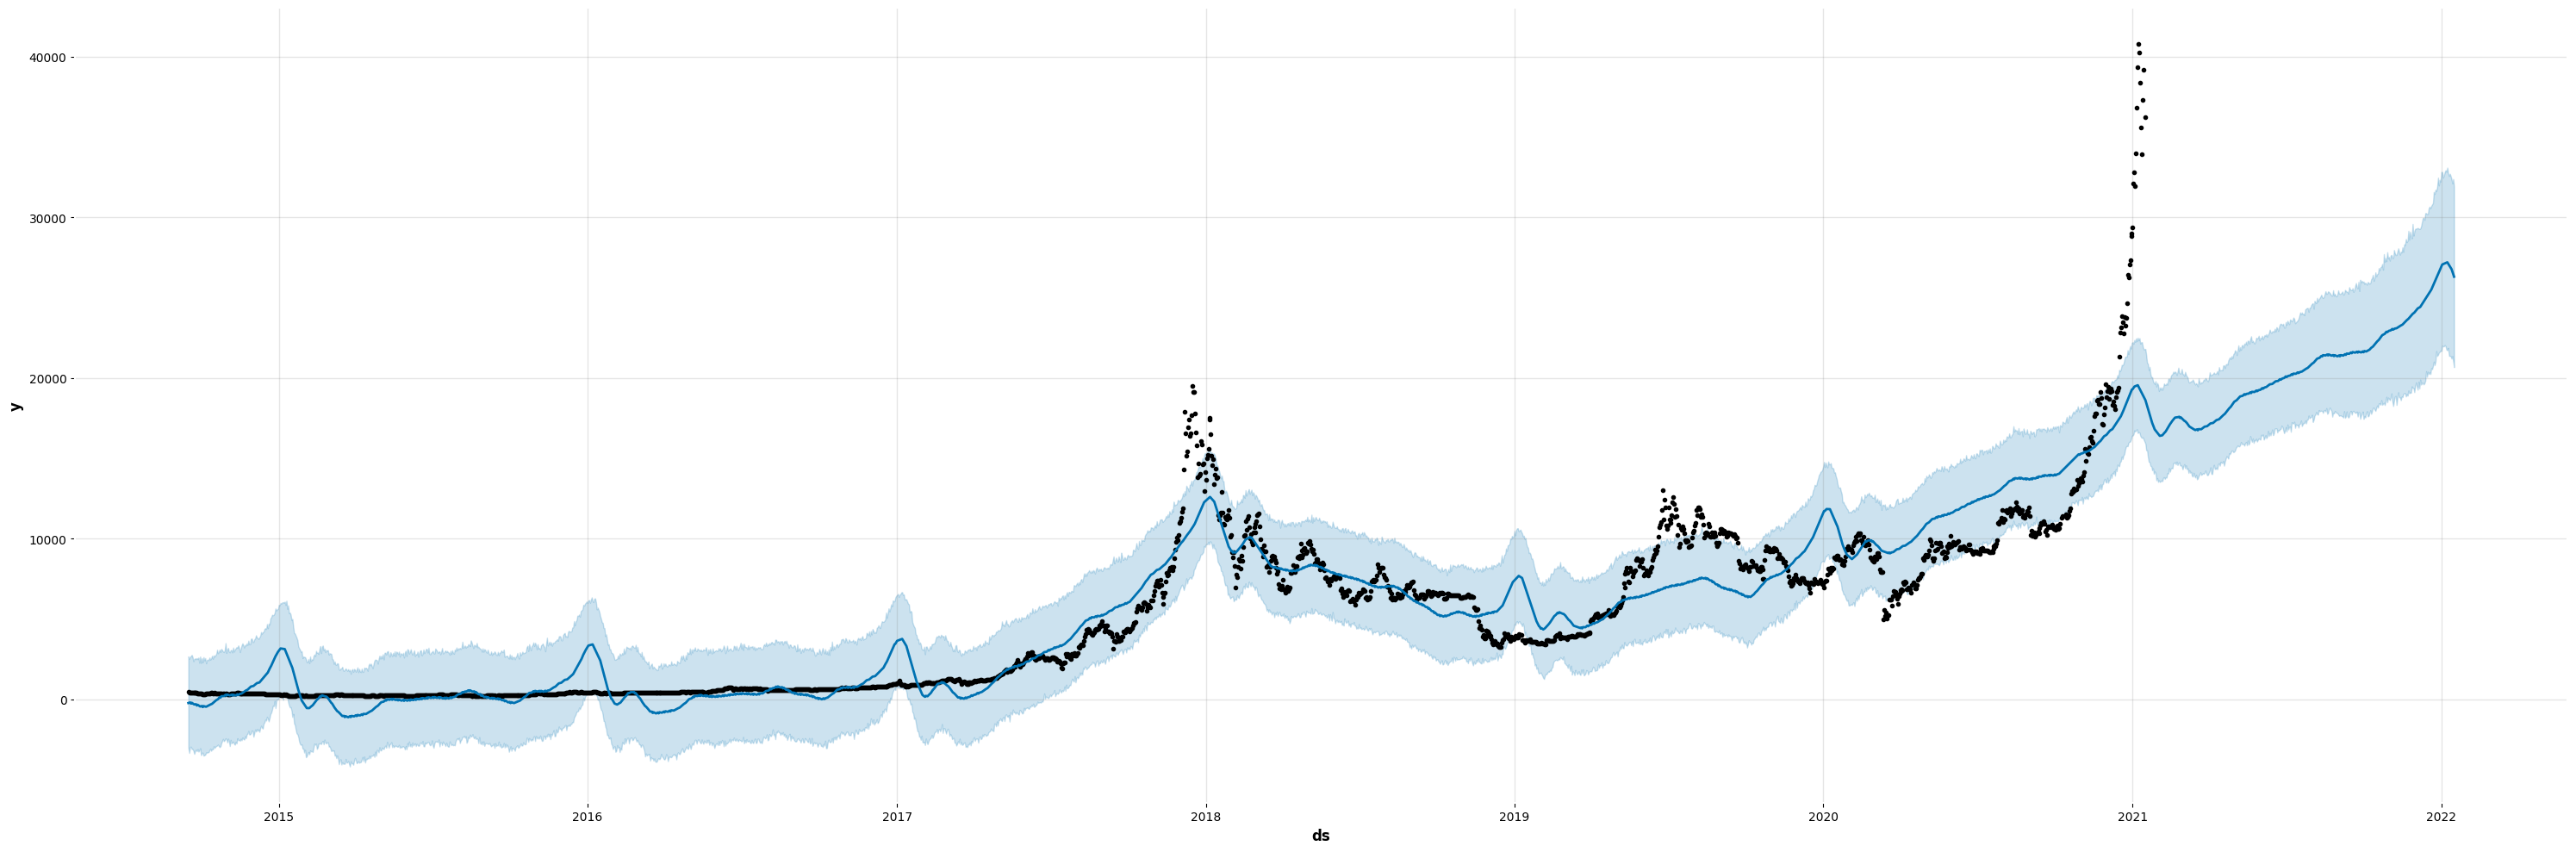

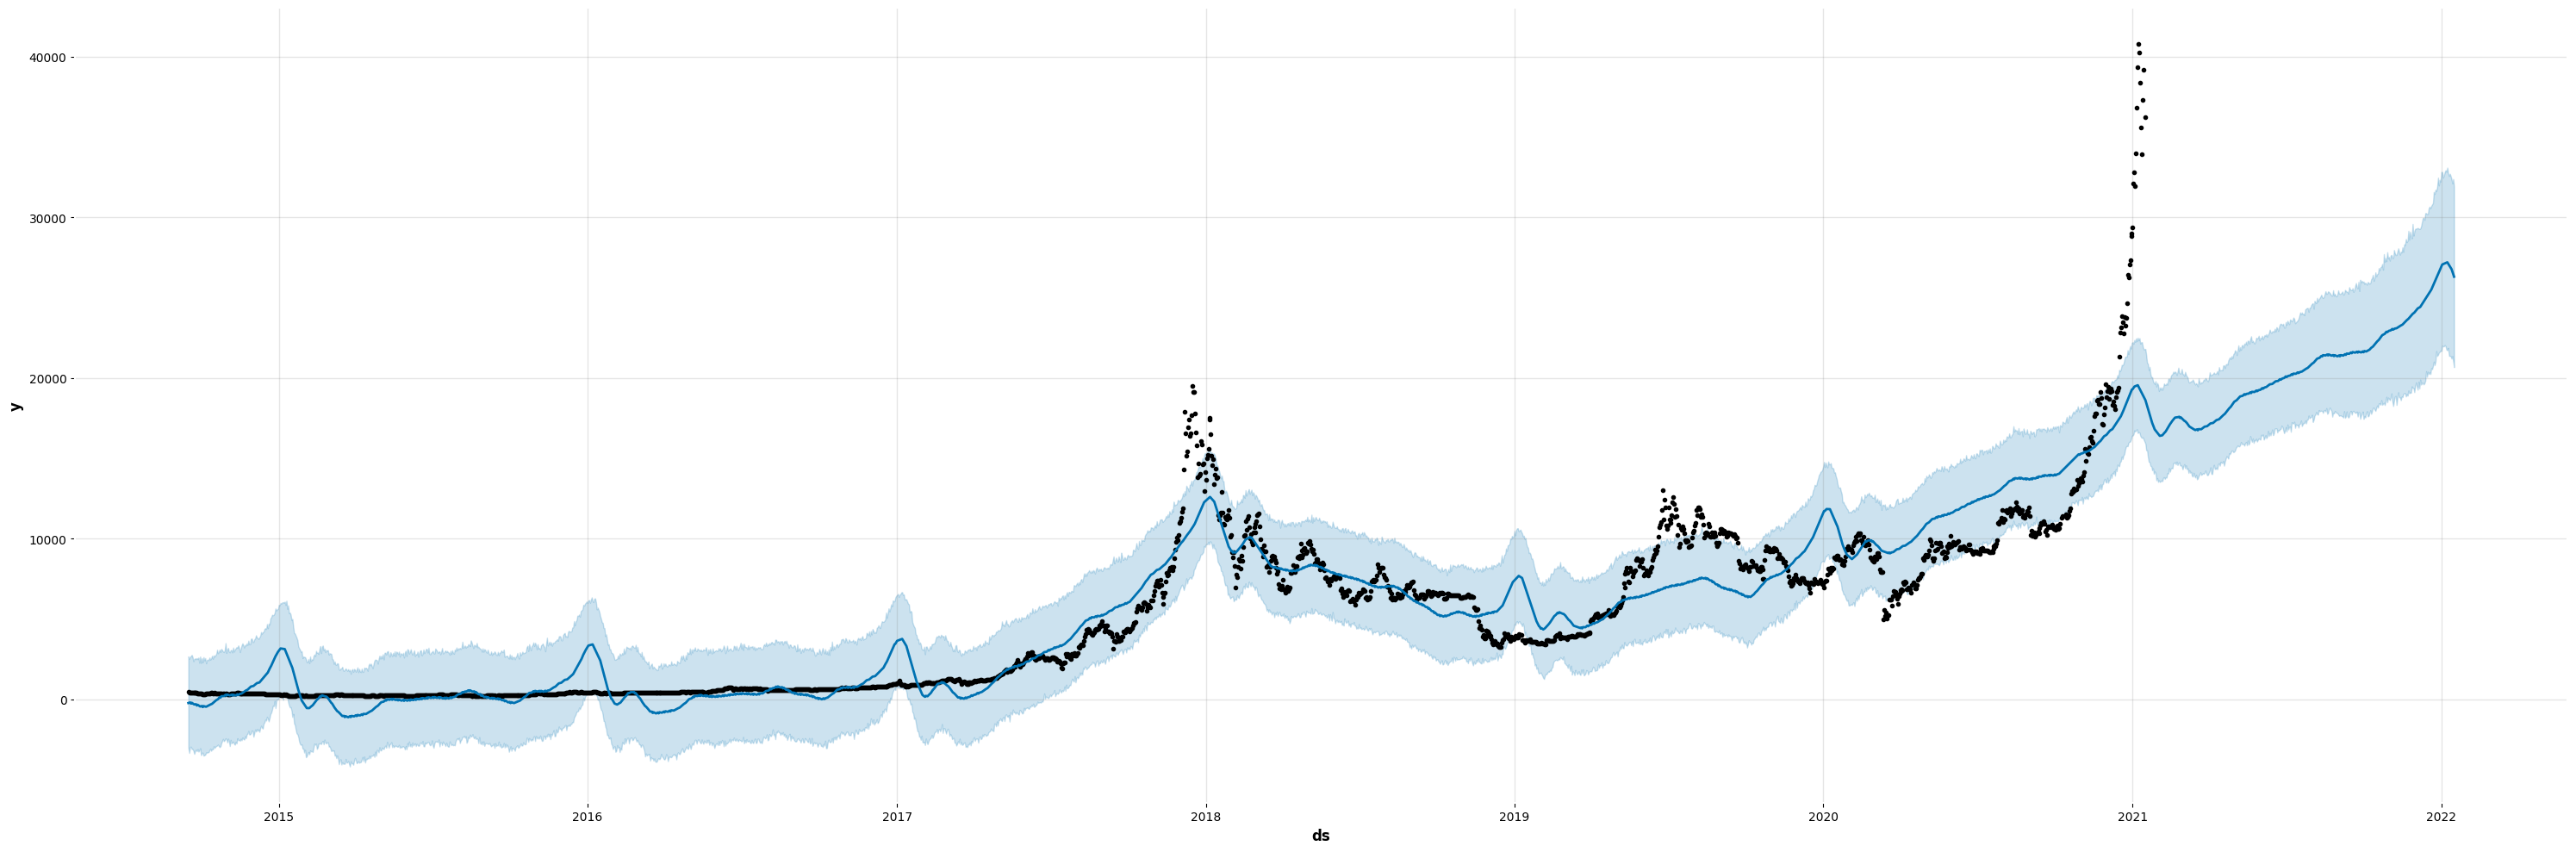

In [50]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(30,10))